# Chart: Correlogram of the Surface Brightness of the Moon


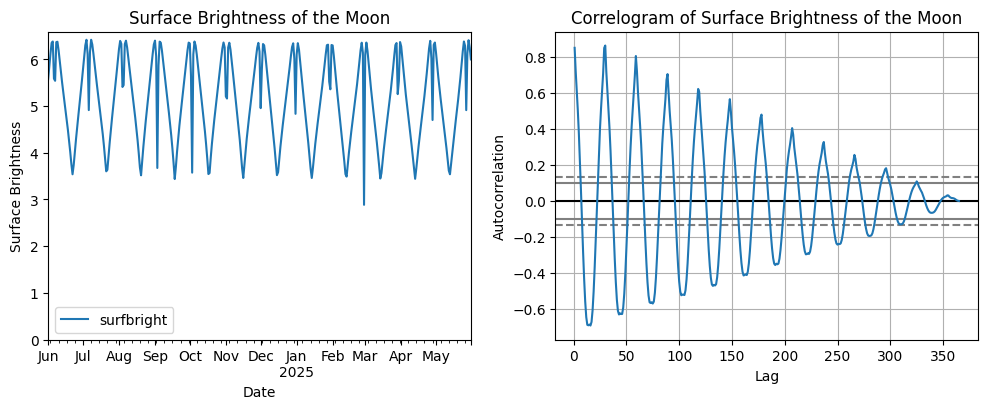

In [ ]:
%pip install -q astroquery

# https://chatgpt.com/share/683df148-2ac8-800c-9ea1-1a2eb51c3593

from astroquery.jplhorizons import Horizons
import matplotlib.pyplot as plt
import pandas as pd

# Define the observer location (500 is for geocentric; for Earth-based location use site codes or coordinates)
# Target ID 301 = Moon
obj = Horizons(id='301', location='500', epochs={'start': '2024-06-01', 'stop': '2025-5-31', 'step': '1d'})

# Request ephemerides with illumination data (quantities='9' gives extra solar phase angle info too)
eph = obj.ephemerides(quantities='9')

# Convert to a pandas DataFrame
df = eph.to_pandas()

# Keep relevant columns (note: ChatGPT column names were wrong)
illum_df = df[['datetime_str', 'surfbright']].copy()
illum_df.columns = ['date', 'surfbright']
illum_df['date'] = pd.to_datetime(illum_df['date'], format='%Y-%b-%d %H:%M')
illum_df = illum_df.set_index('date')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
illum_df.plot(ax=plt.subplot(1,2,1))
plt.title("Surface Brightness of the Moon")
plt.xlabel("Date")
plt.ylabel("Surface Brightness")
plt.ylim(0)

plt.subplot(1, 2, 2)
pd.plotting.autocorrelation_plot(illum_df, ax=plt.subplot(1, 2, 2))
plt.title("Correlogram of Surface Brightness of the Moon")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

plt.show();